In [1]:
import deorbit
from deorbit.simulator.atmos import AtmosphereModel
from deorbit.data_models.atmos import get_model_for_atmos
from deorbit.utils.constants import EARTH_RADIUS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
atmos = AtmosphereModel(get_model_for_atmos("coesa_atmos_fast")())

In [3]:
atmos.velocity(np.array([EARTH_RADIUS + 1000000, 0,0,0]), 0)

array([  0.        , 537.50186299])

In [4]:
sim = deorbit.simulator.run(
    "RK4",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 80000, 0, 0, -7420)),
    noise_types = {"gaussian": {"noise_strength": 0.005}, "impulse": {"impulse_strength": 0.03, "impulse_probability": 1e-5}},
    time_step=0.1,
)
sim_states = np.array(sim.states)
atmos_vel = np.array([atmos.velocity(sim_states[i], sim.times[i]) for i in range(sim_states.shape[0])])

Running simulation with RK4 integrator
Ran 5368 iterations at time step of 0.1 seconds
Impacted at [6163998.66674684 1610815.2718093 ] at velocity [-165.45157343  436.98339326] at simulated time 536.8000000000535s.
Simulation finished in 1.80721 seconds


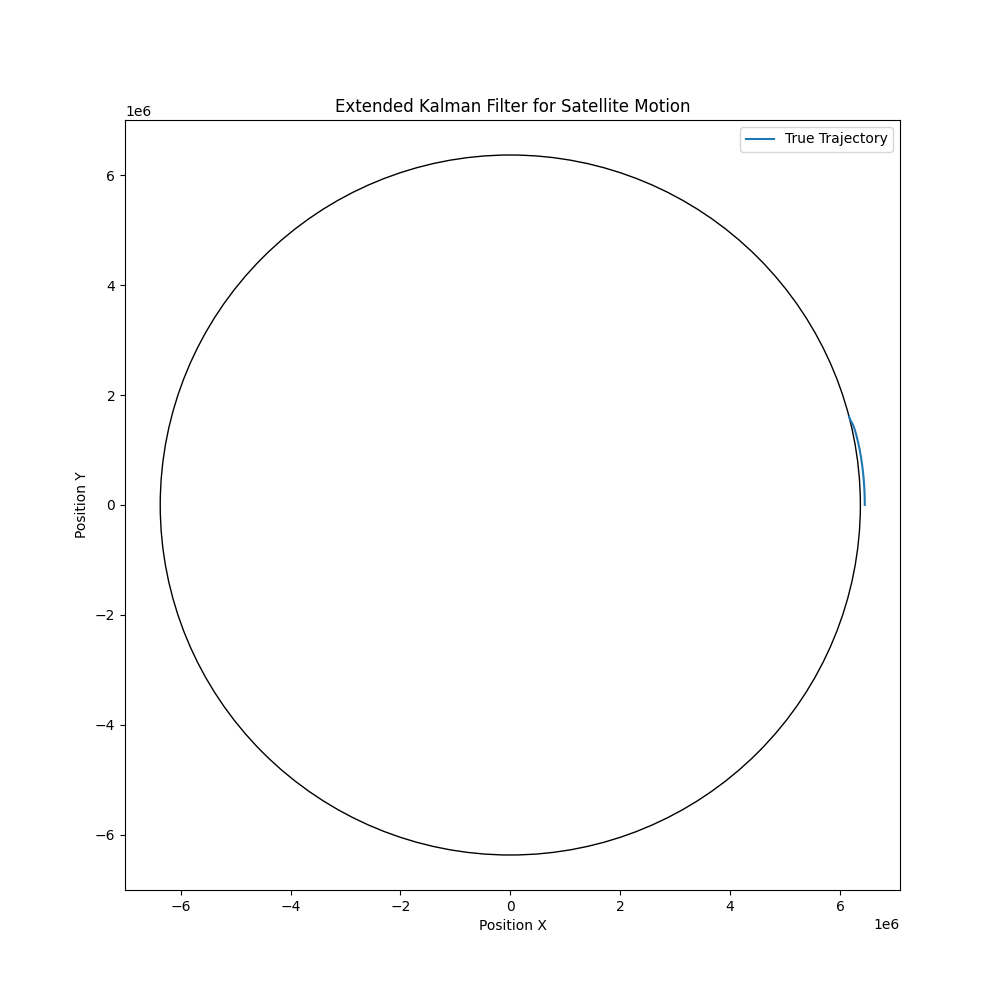

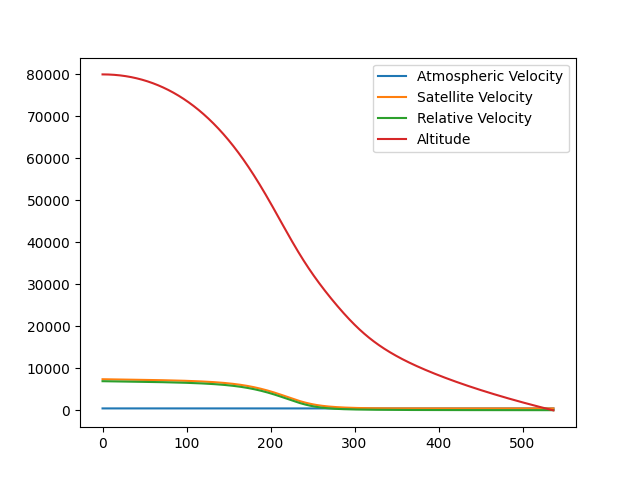

In [5]:
%matplotlib widget

true_traj = sim_states[:, :2]

crash_coords = true_traj[-1, :]


fig, ax1 = plt.subplots()
fig.set_size_inches(10, 10)

plot_range = slice(0, 290925)

ax1.plot(true_traj[:, 0][plot_range], true_traj[:, 1][plot_range], label='True Trajectory')
ax1.set_title('Extended Kalman Filter for Satellite Motion')
ax1.set_xlabel('Position X')
ax1.set_ylabel('Position Y')
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax1.add_patch(earth)
ax1.legend()
plt.show()
fig, ax = plt.subplots()
ax.plot(sim.times[plot_range], np.linalg.norm(atmos_vel, axis=1), label="Atmospheric Velocity")
ax.plot(sim.times[plot_range], np.linalg.norm(sim_states[:, 2:], axis=1), label="Satellite Velocity")
ax.plot(sim.times[plot_range], np.linalg.norm(sim_states[:, 2:] - atmos_vel, axis=1), label="Relative Velocity")
ax.plot(sim.times[plot_range], np.linalg.norm(sim_states[:, :2], axis=1) - deorbit.constants.EARTH_RADIUS, label="Altitude")
ax.legend()